<a href="https://colab.research.google.com/github/hasansin/Text-Analytics/blob/master/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CMM706 – Individual Coursework
#### June 2024

Name  : D.N.H. Weerasinghe


In [ ]:
!pip install contractions
!pip install tabulate
!pip install pyspellchecker
!pip install scikit-learn
!pip install datasets
!pip install imblearn
!pip install sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
   

### Answer to Task 1

Describe the dataset provided with this coursework as you understand it, in an appropriate way to top management.

**1. Import necessary modules for code.**

---







In [ ]:
from IPython.display import display
import pandas as pd
import contractions
import nltk
import re
import numpy as np
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, auc, precision_recall_fscore_support,classification_report
from sklearn.utils import shuffle
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder,label_binarize
from imblearn.over_sampling import RandomOverSampler, SMOTE


spell = SpellChecker()


wnl = WordNetLemmatizer()
ps = PorterStemmer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True



**2. Load the dataset**

---






In [ ]:
# Load the dataset
file_path = '/content/Purchase_Intent.csv'
dataSet = pd.read_csv(file_path)




**3. Method implementation for task 01**

---



Below method is used to get the basic details of the dataset - ex dimensions, data types

In [ ]:
def get_basic_details_of_dataset(data_set):

    # get the dimensions of the dataset
    dimensions = data_set.shape
    print("\n\n Dataset dimensions:", dimensions)

    #preview data in a table - this only shows first 8 rows of the data set
    print("\n\n Preview first 8 rows of the data set in a table:")
    display(pd.DataFrame(data_set.head(8)))

    #preview data in a table - this only shows last 8 rows of the data set
    print("\n\n Preview last 8 rows of the data set in a table:")
    display(pd.DataFrame(data_set.tail(8)))

    # Check for missing values
    missing_values = data_set.isnull().sum()

    # Get data types and summary statistics
    data_types = data_set.dtypes
    summary_statistics = data_set.describe(include='all')

    # Print the results
    print("\n\n Data types:")
    #print data types of the data set
    data_types_df = pd.DataFrame({'Data Types':data_types})
    display(data_types_df)

    #print the summary statistics of thedata set
    print("\n\n Summary statistics:")
    display(pd.DataFrame(summary_statistics))

    #print missing values of the data set
    print("\n\n Missing values:")
    missing_valies_df = pd.DataFrame({'Missing Values':missing_values})
    display(missing_valies_df)

*Below method is used to get the duplication tweet count of each class in the dataset*

In [ ]:
# Check for duplicate tweets
def display_duplicated_tweets():
    duplicated_tweet_List = []

    #iterrate through data set and create a list with duplication of each class
    for name_of_class in dataSet['class'].unique():
      duplicate_tweets = dataSet[dataSet['class']== name_of_class].duplicated(subset='text').sum()
      duplicated_tweet_List.append({'class name': name_of_class, 'count':duplicate_tweets})

    #Display duplicated data in a bar graph
    display(pd.DataFrame(duplicated_tweet_List).plot(kind='bar', x='class name', y='count'))

    #Display duplicated data in a table
    print("\n\n Duplicate tweets:")
    display(pd.DataFrame(duplicated_tweet_List))
    print("\n\n")

*Below method is used to get the distribution of the classes in the data set*`

In [ ]:
# Distribution of the class variable
def display_class_distribution(data_set):

  # get the data count of each class
  class_counts = data_set['class'].value_counts()
  print("\n\nClass counts - Table View:")

  #display class counts in a table
  display(pd.DataFrame({'class counts':class_counts}))

  # display the distribution of the class variable in a bar graph
  print("\n\n Class counts - Bar graph View:")
  display(pd.DataFrame(data_set['class'].value_counts()).plot(kind='bar'))




**4. Method execution**

---



*get basic details of data set*



In [ ]:
get_basic_details_of_dataset(dataSet)




 Dataset dimensions: (2108, 2)


 Preview first 8 rows of the data set in a table:


,class,text
0,no,i'll buy the iphone x if it can get ac...
1,no,Some dude in FB selling the iPhone X 64 gb...
2,yes,Home dab emote man today and I get hopped on...
3,yes,Buy an iPhone X
4,no,I hate iOS 11. My iPhone 6+ works 10X slower...
5,undefined,Brilliant @johnlewisretail - added iPhone X...
6,undefined,They doing that on purpose cause mine is to. T...
7,no,Bo-go sale tomorrow at T-Mobile buy one get...




 Preview last 8 rows of the data set in a table:


,class,text
2100,no,Ew iPhone 7’s camera quality looks so trash ...
2101,undefined,$150 Fake iPhone X vs $1150 iPhone X ! ...
2102,no,@ Apple hey why does your brand new expensiv...
2103,no,Unpopular opinion: I hate the iPhone X m...
2104,undefined,Apple iPhone X 64GB Smartphone Space Gray ...
2105,undefined,The bad thing of not having a iPhone X i...
2106,yes,i want the iphone x so bad :’(
2107,no,can anyone explain to me why the incredibly e...




 Data types:


,Data Types
class,object
text,object




 Summary statistics:


,class,text
count,2108,2108
unique,6,1937
top,undefined,0
freq,790,25




 Missing values:


,Missing Values
class,0
text,0


*get duplicated data in each class of data set*


<Axes: xlabel='class name'>



 Duplicate tweets:


,class name,count
0,no,2
1,yes,15
2,undefined,76
3,Yes,0
4,Undefined,0
5,No,0


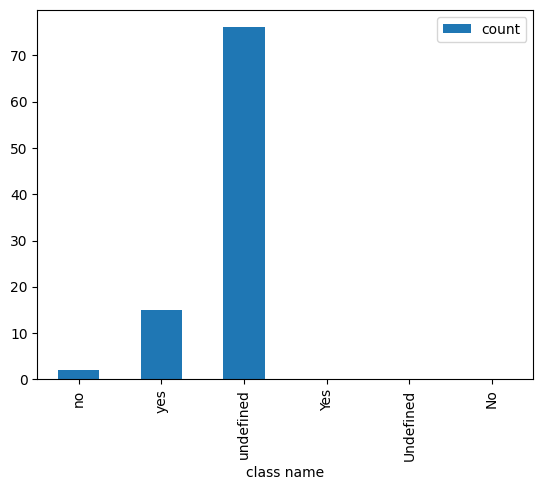

In [ ]:
display_duplicated_tweets()

*display the data distribution of each class before preprocessing data*



Class counts - Table View:


,class counts
class,
undefined,790
yes,613
no,426
Undefined,157
Yes,85
No,37




 Class counts - Bar graph View:


<Axes: xlabel='class'>

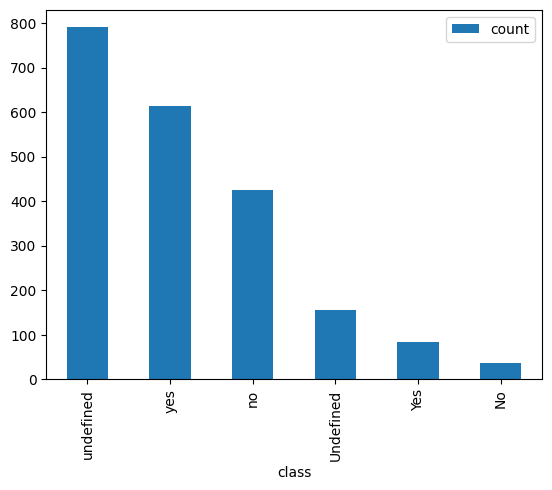

In [ ]:
display_class_distribution(dataSet)


Explain the challenges encountered and the observations based on the output above


### Challenges

---

*   **Imbalanced Data** - From all  categories in the data set, most occurences belong to the undefined category. 947(both undefiend & Undefiend) out of 2108 belong to the undefined category. This might affect the performance of classification models and the accuracy of insights derived from the data.

* **Class Duplication** - Also same class has duplicated. ex - there are two sepearted classes for "yes" and "Yes" even though, meaning of those are same.

### Observations

---



*   **data quality** - The dataset contains noisy data which mean irrelevnt or inappropriate data which lowers the quality of the data set. As a example, the first and the second record of the data set does not seem to be related to a purchasing.

* **Imbalanced Data** - Most of data is under the undefined category. This might be due to the misclassifed of missing data, which needs to be corrected to ensure accurate labeling.















### Answer to Task 2

Perform any further cleaning required, tokenize the data and prepare the data for model building. Describe this final dataset in terms of the number of documents (tweets), the number of total words and the number of unique words in the corpus as a whole. Describe also the number of documents in each of the classes.

**1. Implement methods to perform cleaning & preprocesssing**

---



In [ ]:
## Preprocessing Methods

#expand contractions - expand words like it's to it is
def expandContractions(text):
  return contractions.fix(text)

#correct spellings - corrects the wrong spellings
def correct_spellings(text):
  words = text.split()
  corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
  return ' '.join(corrected_words)

#convert text to lowercase -covert text in text section and class section to lower case
def convertTolowerCase(data_set):
  data_set['text'] = data_set['text'].str.lower()
  data_set['class'] = data_set['class'].str.lower()

#remove mentions in text fields -  remove words next to @
def removeMentions(text):
  return re.sub(r'@\S+', '',text)

#remove extra spaces may include in text sentences
def removeExtraSpaces(text):
  return re.sub(r'\s+', ' ',text).strip()

#remove special charcters
def removeSpecialCharacters(text):
  return re.sub(r'[^\w\s]', '',text)

#remove numerical values since these are cause noice
def removeNumericalValues(text):
  return re.sub(r'\d+', '',text)

#remove undefiend class from the dataset
def remove_class_undefined(data_set):
   data_set.drop(data_set[data_set['class'] == 'undefined'].index, inplace=True)

#get all undefined data
def get_undefined_data(data_set):
  return data_set[data_set['class'] == 'undefined']

#remove stop words - removes stop words in english
def removeStopWords(text):
  words = tokenize(text)
  stop_words = set(nltk.corpus.stopwords.words('english'))
  negations = ['not', 'no',"nor", 'never','neither']
  stop_words = stop_words.difference(negations)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

# tokenize text in text section with using nltk tokenizer
def tokenize(text):
  #tokenize text from text column
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

# Annotate text tokens with POS tags
def pos_tag_text(text):

    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

    tokens = tokenize(text)
    tagged_text = nltk.pos_tag(tokens)

    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

# lemmatize text based on POS tags
def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

##get th summerize data after preprcessing is done
def summerize_data_after_preprocessing(data_set):
    print('\n\n-------------------------------------------------------> ')
    print("\033[1mSummerize Data After Preprocessing\033[0m")
    print('------------------------------------------------------->')
    display_class_distribution(data_set)
    get_basic_details_of_dataset(data_set)


#data cleaning
def dataPreprocessing(data_set,isNotTokenizing) :

    #convert the data into lowercase - both class and text data
    convertTolowerCase(data_set)

    #expand contractions - this expands the words like don't, haven't in to do not, have not
    data_set['text'] = data_set['text'].apply(lambda x: expandContractions(x))

    #removing extra spaces- removes the extra space findes insides the texts
    data_set['text'] = data_set['text'].apply(removeExtraSpaces)

    #removing mentions - removes @sign related text
    data_set['text'] = data_set['text'].apply(removeMentions)

    #removing special charaters - removes special characters to reduce noice
    data_set['text'] = data_set['text'].apply(removeSpecialCharacters)

    #removing numerical values
    data_set['text'] = data_set['text'].apply(removeNumericalValues)

    #remove stop words
    data_set['text'] = data_set['text'].apply(removeStopWords)

    if isNotTokenizing:
      #lemmatize text
      data_set['text'] = data_set['text'].apply(lemmatize_text)

    return data_set



**2. Creating a Binary Classifier to Calssify Undefined Data**


---



Below method is used classify undefiened data. In here, when creating the classifier, there was a issue with the data set since the data is still unbalaced.

 To balance the data SMOTE oversampling is used. This oversampling is only performed for the training dataset in order to avoid the data leakage which means, same data rows get include in both test and train data. Another reason to do this only for training data is, to avoid overfitting by providing a balanced data set for the model during the training & not resampling test data allow model to perform more accurately.

 Moreover TfidfVectorizer is used in here instead using CounterVerctor. Reason for that is Counterverctor is treats all words equally(inmportance in not considered) and simply count the frequancies of each word while,TfidfVectorizer capures the imporatant terms in the entire corpus.

 Using this vectoriser we conver text data to numerical values.

In [ ]:
from collections import Counter

def classify_undefiened_data(data_set):
    #get undefined data
    undefiend_data = get_undefined_data(data_set);

    #remove undefiend class
    remove_class_undefined(data_set)

    #splitting data set in to train and test data
    X_train, X_test, y_train, y_test = train_test_split(data_set['text'], data_set['class'], test_size=0.2, random_state=42)


    #vectorize data using tfidf vectorizer
    tfidfVectorizer = TfidfVectorizer()

    #fit and transform the train data in to a vector
    X_train_vector = tfidfVectorizer.fit_transform(X_train)

    #transform the test data in to a vector
    X_test_vector = tfidfVectorizer.transform(X_test)

    print("\nbefore resampling>", Counter(y_train))

    #oversampling the class which has minor values
    oversampling_smt= SMOTE(random_state=42)

    #resampling the train data -  resampling only train data prevents data leakage
    X_train_resampled, y_train_resampled = oversampling_smt.fit_resample(X_train_vector, y_train)
    print('\nafter resampling', Counter(y_train_resampled))

    #create and train the model
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    #predict  data using vectozied test data
    y_predict = model.predict(X_test_vector)

    print("\naccuracy of the model:",accuracy_score(y_test, y_predict))


    #convert undefiend data in to a vector using tfidf vectorizer
    undefiend_data_x_vector = tfidfVectorizer.transform(undefiend_data['text'])

    #get the probabilities using created model
    probabilites = model.predict_proba(undefiend_data_x_vector)

    #set confidence threshold
    confidence_threshold = 0.7

    #get high confidence indices
    hgh_cn_ind = (probabilites.max(axis=1) > confidence_threshold)

    #get high confidence predictions
    hgh_cn_pd = model.classes_[probabilites.argmax(axis=1)[hgh_cn_ind]]

    #add classified data in to original data set
    classified_text_data = undefiend_data['text'][hgh_cn_ind]

    #get the classified data as a data frame
    classified_data = pd.DataFrame({'text': classified_text_data, 'class': hgh_cn_pd})

    #add classified data in to original data set
    combind_data = pd.concat([data_set, classified_data], ignore_index=True)

    #shuffle the data set as the final step
    combind_data = shuffle(combind_data,random_state=42)

    #update the data set
    return combind_data


**3. Perform data preprocessing & classify undefined data**

---




before resampling> Counter({'yes': 551, 'no': 377})

after resampling Counter({'yes': 551, 'no': 551})

accuracy of the model: 0.8240343347639485


-------------------------------------------------------> 
Summerize Data After Preprocessing
------------------------------------------------------->


Class counts - Table View:


,class counts
class,
yes,898
no,556




 Class counts - Bar graph View:


<Axes: xlabel='class'>



 Dataset dimensions: (1454, 2)


 Preview first 8 rows of the data set in a table:


,class,text
497,no,feel iphone x expensive
1260,no,first thing hate
411,yes,love wish gotten iphone x http fbmejdsmfc
1179,yes,buy one get one free promo iphone x iphone dope
1033,no,omg hate iphone x anyone else screen shot peop...
613,yes,get funding january buy iphone x one painting ...
218,no,get iphone x realize bad
1181,yes,dead as like go apple headquarters see iphone ...




 Preview last 8 rows of the data set in a table:


,class,text
466,yes,tmobile couple get yo iphone x try get adopt w...
121,no,no no no no no no no phone battery fuck phone ...
1044,no,one crisis iphone x one lightning port need al...
1095,no,surprised late processor plus apple pencil lik...
1130,no,binance app iphone x laptop lag bad
1294,yes,need one iphone x
860,yes,bout mph spring garden get iphone x
1126,no,oh not bad thing iphone x




 Data types:


,Data Types
class,object
text,object




 Summary statistics:


,class,text
count,1454,1454
unique,2,1318
top,yes,want iphone x bad
freq,898,15




 Missing values:


,Missing Values
class,0
text,0


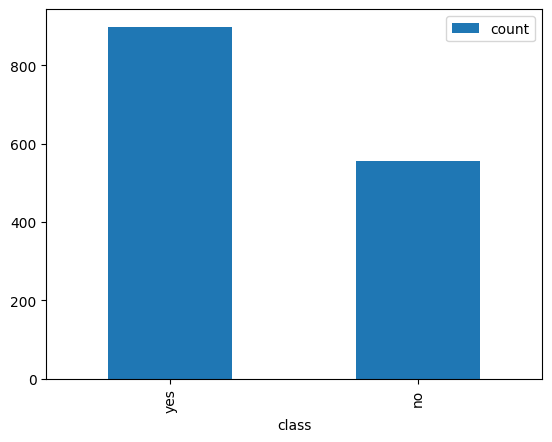

In [ ]:
#perform data preprocessing
processed_data = dataPreprocessing(dataSet,True);

#classify undefined data in to yes or no classes
classified_data = classify_undefiened_data(processed_data);

#summrization of above two processes
summerize_data_after_preprocessing(classified_data);

**5. Implement method to display dataset after above steps**

---



In [ ]:

def display_preprocessed_dataset(data_set):
   #number of documents (tweets)
   print("\n\nNumber of documents (tweets):", data_set.shape[0])

   # the number of total words
   total_words = sum(len(word.split()) for word in data_set['text'])
   print("\n\nThe number of total words:", total_words)

   #the number of unique words in the corpus as a whole
   unique_words = set()
   for text in data_set['text']:
       words = text.split()
       unique_words.update(words)
   print("\n\nThe number of unique words in the corpus as a whole:", len(unique_words))


   #preview data in a table - this only shows first 8 rows of the data set
   print("\n\nPreview first 8 rows of the data set in a table:")
   display(pd.DataFrame(data_set.head(8)))

   #number of documents in each of the classes
   class_counts = data_set['class'].value_counts()
   class_count_in_DF = pd.DataFrame({'class counts':class_counts})
   print("\n\nPreview Number of documents in each of the classes in table:")
   display(class_count_in_DF)

   #preview data in a bar graph
   print("\n\nPreview Number of documents in each of the classes in a bar graph:")
   display(pd.DataFrame(data_set['class'].value_counts()).plot(kind='bar'))

**6. Perform display data method**

---



Describe the final dataset shape.



Number of documents (tweets): 1454


The number of total words: 14692


The number of unique words in the corpus as a whole: 2632


Preview first 8 rows of the data set in a table:


,class,text
497,no,feel iphone x expensive
1260,no,first thing hate
411,yes,love wish gotten iphone x http fbmejdsmfc
1179,yes,buy one get one free promo iphone x iphone dope
1033,no,omg hate iphone x anyone else screen shot peop...
613,yes,get funding january buy iphone x one painting ...
218,no,get iphone x realize bad
1181,yes,dead as like go apple headquarters see iphone ...




Preview Number of documents in each of the classes in table:


,class counts
class,
yes,898
no,556




Preview Number of documents in each of the classes in a bar graph:


<Axes: xlabel='class'>

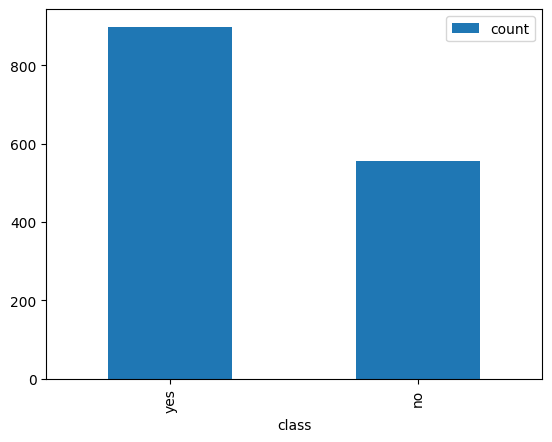

In [ ]:
display_preprocessed_dataset(classified_data)


**In above section. data preprocessing performed and then using preprocessed data create a classifier to undefined data. After that, using the classifier undefined data is get classified and combined to the dataset with the given class labels. Finally,to display the cimbined dataset's specification "summerize_data_after_preprocessing"  method is used.**


**Since undefined data count is higher, using a binary classiffer,classified the undefiened data in to yes or no classes to increase the performance. most of unwanted data is now removed from the data set,like stop word except negations. Reason for not removing negation is that we need negations to decide the purchasing intent and in a binary classification.It is must to have positive and negative data(If negations are removed then the negative data will become positive).
Class duplications removed by lower casing whole dataset in data preprocessing.
Now data has only two classes as 'yes' and 'no'. With using undefiend data classifier has increased the data counts of each class. ex- previously "yes" & "Yes" had only 696. Now "yes" class count is 898.**








### Answer to Task 3

Use a non-deep learning classification algorithm in order to define a baseline for exploring further model building. Report the performance of the baseline model and interpret the model and its predictions to top management.

**1. Implement method for baseline model**




---





here also used same resampling technique used in undefiend data classifier. Same vectorizer used.

In [ ]:
#baseline model - Logistic Regression
def create_baseline_model(data_set):
    #check if data is set of token list
    if isinstance(data_set['text'].iloc[0],list):
      data_set['text'] = data_set['text'].apply(lambda text : ''.join(text))

    tfidf_Vectorizer = TfidfVectorizer()

    #
    X_data = tfidf_Vectorizer.fit_transform(data_set['text'])
    y_data = data_set['class']

    #split data set in to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    print("\n before resampling>", Counter(y_train))

    #as preprocessed data shown in task 2, class **yes** has more data than the **no** class this might affect  the accuracy of the model. so we need to resample this data set
    oversampler = SMOTE(random_state=42)
    #to avoid data leakage oversampling is only perform to the training data.
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    print("\n after resampling>", Counter(y_train_resampled))

    #training model with max iteration of 1000
    lr_classifier = LogisticRegression(max_iter= 1000)

    #fit the train data
    lr_classifier.fit(X_train_resampled, y_train_resampled)

    #predict using classifier
    y_pred = lr_classifier.predict(X_test)


    #performence metrics of baseline model

    if data_set['class'].dtype == 'object': #String labels
        pos_label = 'no'
    else:  # Numerical labels
        pos_label = 0

    #accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    #precision of the model
    precision = precision_score(y_test, y_pred,pos_label=pos_label)

    #recall of the model
    recall = recall_score(y_test, y_pred,pos_label=pos_label)

    #f1 score of the model
    f1 = f1_score(y_test, y_pred,pos_label=pos_label)

    #confusion metrics for baseline model
    cmonfusion_metrics= confusion_matrix(y_test, y_pred)

    #convert string labels to numeric using LabelEncoder
    le = LabelEncoder()
    y_test_numeric = le.fit_transform(y_test)


    y_test_bin = label_binarize(y_test_numeric, classes=np.unique(y_test_numeric))
    y_pred_prob = lr_classifier.predict_proba(X_test)

    roc_data = { "y_test_bin":y_test_bin, "y_pred_prob":y_pred_prob, "y_test_numeric":y_test_numeric }

    return accuracy, precision, recall, f1, cmonfusion_metrics ,roc_data




**2. Define the baseline by invoking above method**

---



below code perform the baseline model to get the accuracy and  other metrics to understand the problem.

In [ ]:
basline_results = create_baseline_model(classified_data);


 before resampling> Counter({'yes': 715, 'no': 448})

 after resampling> Counter({'yes': 715, 'no': 715})


Report on the baseline model performance.

**3. Display Accuracy, Precision, Recall & F1-score in a bar chart & in a Table**

---




 
 Accuracy, Precision, Recall & F1-score of Baseline Model in a Table 




,accuracy,precision,recall,f1_score
0,0.85567,0.789474,0.833333,0.810811



 
 Accuracy, Precision, Recall & F1-score of Baseline Model in a Bar Graph 




<Axes: xlabel='Accuracy Metrics'>

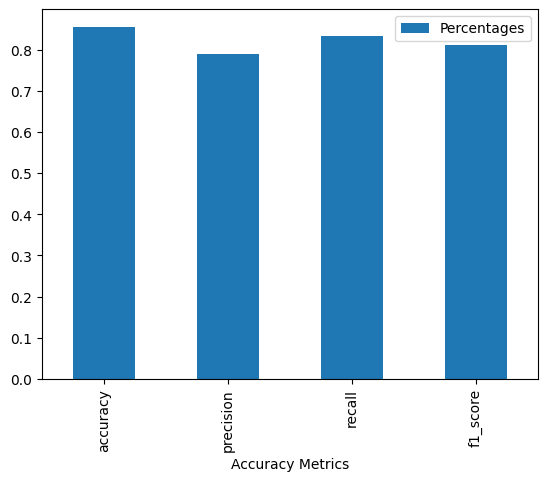

In [ ]:
#plot baseline model performence using the data recieved from above method invocation
accuracy, precision, recall, f1, cmonfusion_metrics ,roc_data = basline_results

print('\n \n Accuracy, Precision, Recall & F1-score of Baseline Model in a Table \n\n')
display(pd.DataFrame({'accuracy': [accuracy], 'precision': [precision], 'recall': [recall], 'f1_score': [f1]}))

#create a dataframe using data recieves from

print('\n \n Accuracy, Precision, Recall & F1-score of Baseline Model in a Bar Graph \n\n')
accuracy_df = pd.DataFrame({'Percentages':[accuracy,precision,recall,f1],"Accuracy Metrics":['accuracy', 'precision', 'recall', 'f1_score']}).plot(x='Accuracy Metrics', y='Percentages', kind='bar')

#display dataframe
display(accuracy_df)


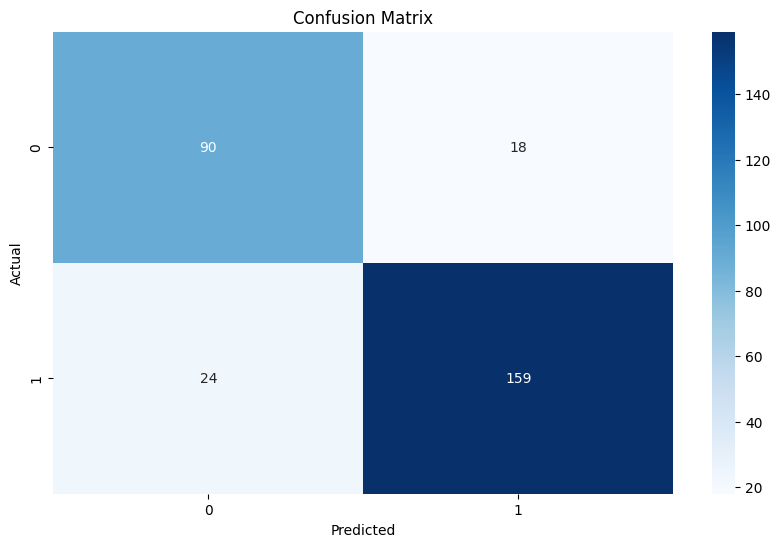

In [ ]:
#plot confusion metrics
#this helps to understand the false positive, false negative, true negative and true positive
#provides an idea about with which class that model perform well.

plt.figure(figsize=(10, 6))
sns.heatmap(cmonfusion_metrics, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In above graph true negative has 90 data points and true positive has 159 while false negative has 24 data point and false positive has 18 data points.
This has lead to the acuuracy depict in above table.(TP - True Positive , TN - True Negative, FP - False Positive , FN - False Negative
)

Accuracy = (TP + TN) / (TP + FP + FN + TN)

Precision = TP / (TP + FP)


Recall = TP / (TP + FN)


F1 Score = 2 * (Precision * Recall) / (Precision + Recall)







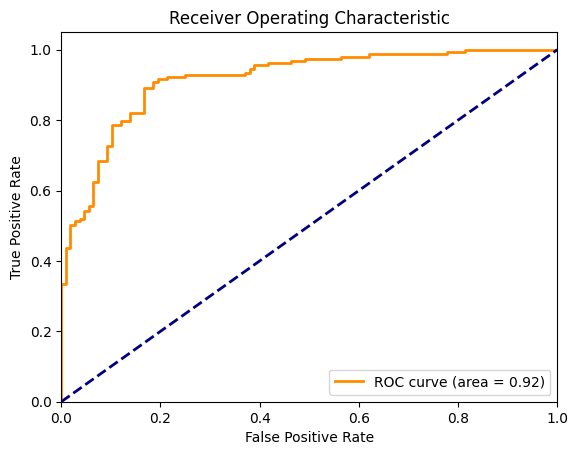

In [ ]:

# Convert string labels to numeric using LabelEncoder
le = LabelEncoder()

y_test_bin = label_binarize(roc_data['y_test_numeric'], classes=np.unique(roc_data['y_test_numeric']))

fpr, tpr, thresholds = roc_curve(roc_data['y_test_numeric'], roc_data['y_pred_prob'][:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Since logistic regression model performance getting higer accuracy for this dataset, this indicate that the relationship between features and target variables are linear.**

### Answer to Task 4

Use three (03) different tokenization algorithms to tokenize the dataset.

**1. White space tokenizer**

---



**Reason to choose whitspace tokenizer  :**

This dataset consist of text data separated from white spaces. So, using white spaces simply can tokenize the text data of the dataset. Even though this is not considering any language formats, this tokenizer is very fast due to its simplicity.

In [ ]:
# 1. white space tokenizer

# Load the dataset
file_path = '/content/Purchase_Intent.csv'
wht_tk_data = pd.read_csv(file_path)

# function for white space tokenize
def white_space_tokenizer(text):
    return text.split()

#data precrossesing
wht_preprocessed_data =dataPreprocessing(wht_tk_data,False);

#classify undefined data in to yes or no classes
wht_classified_data = classify_undefiened_data(wht_preprocessed_data);

#tokenizing data by white spaces
wht_classified_data['text'] = wht_classified_data['text'].apply(white_space_tokenizer)



before resampling> Counter({'yes': 551, 'no': 377})

after resampling Counter({'yes': 551, 'no': 551})

accuracy of the model: 0.8111587982832618


**2 . lemmatization**

---



**Reason to lemmatization   :**

Lemmatization significantly reduces the vocabulary size of RNNs, CNNs, and transformers, which significantly helps in model training and speeds up prediction durations. Words that are reduced to their most basic form help models better understand various text formats, which leads to more accurate predictions. This improves generalization. Additionally, it facilitates contextual understanding by combining similar words into a single basic form, which helps to effectively capture semantic meaning.  This is more effective in task like text classification which we are currently perfomaing in this course work.






In [ ]:
#2 stemming and lemmatizing

# Load the dataset
file_path = '/content/Purchase_Intent.csv'
stem_lz_data = pd.read_csv(file_path)

#preprocessing
stem_lz_preprocessed_data = dataPreprocessing(stem_lz_data,False);

#classify undefined data in to yes or no classes
stem_lz_classified_data = classify_undefiened_data(stem_lz_preprocessed_data);

#tokenizing data with using both steming and lemmatizing
stem_lz_classified_data['text'] = stem_lz_classified_data['text'].apply(lemmatize_text)



before resampling> Counter({'yes': 551, 'no': 377})

after resampling Counter({'yes': 551, 'no': 551})

accuracy of the model: 0.8111587982832618


**3. SentencePiece**

---

By breaking text into subwords, SentencePiece would reduce the vocabulary size significantly. This leads to more efficient training and inference because the model can operate with a smaller set of token.SentencePiece allows a unified approach to tokenization, which results in consistency across all tokenization approaches and is necessary when using models such as transformers that rely on strict token alignment. This is achieved by a consistent input data representation approach applied throughout the model architecture.SentencePiece is also compatible with the RNN model, the CNN model. It is overall very versatile for use across different architectures, with no specific tweaks or adjustments. Also can be trained on a specific dataset that is actually being used for the model.


In [ ]:
#3. sub-word segmentation scheme

# Load the dataset
file_path = '/content/Purchase_Intent.csv'
sentence_ps_data = pd.read_csv(file_path)


def create_vocabulary():
   with open('vocabulary.txt', 'w') as f:
       for text in sentence_ps_data['text']:
            f.write(text + '\n')

def train_sentence_piece_model():
    spm.SentencePieceTrainer.train('--input=vocabulary.txt --model_prefix=spm_model --vocab_size=3000')



#create a vacablury to train the sentenpiece model
create_vocabulary()

#train the sentence piece model
train_sentence_piece_model()

#load the model
spm_model = spm.SentencePieceProcessor()
spm_model.Load('spm_model.model')

#preprocessing data
sp_preorocessed_data =dataPreprocessing(sentence_ps_data,False);

#classify undefined data in to yes or no classes
sp_classified_data = classify_undefiened_data(sp_preorocessed_data);

#tokenization using the trained model above
sp_classfied_tokenized = sp_classified_data
sp_classfied_tokenized['text'] = sp_classfied_tokenized['text'].apply(lambda x: spm_model.encode_as_pieces(x))




before resampling> Counter({'yes': 551, 'no': 377})

after resampling Counter({'yes': 551, 'no': 551})

accuracy of the model: 0.8111587982832618


In above code

**4. Create a model to check the effect for accuracy occurs from each tokenizer**

---



In [ ]:
def create_model_to_check_accuracy(data_set):
    #check if data is set of token list
    if isinstance(data_set['text'].iloc[0],list):
      data_set['text'] = data_set['text'].apply(lambda text : ''.join(text))

    vectorizer = TfidfVectorizer()

    X = vectorizer.fit_transform(data_set['text'])
    y = data_set['class']

    #transform x  & y to numpy array
    X = X.toarray()
    y = np.array(y)

    #split data set in to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\n \n before resampling>", Counter(y_train))

    oversampler = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    print("\n \n after resampling>", Counter(y_train_resampled))

    #creating model
    model = MultinomialNB()

    #fit the train data
    model.fit(X_train_resampled, y_train_resampled)

    #predict using classifier
    y_pred = model.predict(X_test)

    #performence metrics of baseline model

    if data_set['class'].dtype == 'object': #String labels
        pos_label = 'no'
    else:  # Numerical labels
        pos_label = 0

    #accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    #precision of the model
    precision_no = precision_score(y_test, y_pred,pos_label=pos_label)

    #recall of the model
    recall = recall_score(y_test, y_pred,pos_label=pos_label)

    #f1 score of the model
    f1 = f1_score(y_test, y_pred,pos_label=pos_label)

    #confusion metrics for baseline model
    cmonfusion_metrics= confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cmonfusion_metrics



Compare the performance of the three tokenizers on the intent classification task.

**5. Display accuracy comparison of each tokenizer**


 before resampling> Counter({'yes': 714, 'no': 438})

 after resampling> Counter({'yes': 714, 'no': 714})

 before resampling> Counter({'yes': 714, 'no': 438})

 after resampling> Counter({'yes': 714, 'no': 714})

 before resampling> Counter({'yes': 714, 'no': 438})

 after resampling> Counter({'yes': 714, 'no': 714})

 
 Accuracy Comparison of Tokenizers ---- logistic regression 


Table View:


,white space,lemmatize,sentence peice
accuracy,0.597222,0.826389,0.822917
precision,1.000000,0.824074,0.810811
recall,0.033333,0.741667,0.750000
f1_score,0.064516,0.780702,0.779221




Bar Graph View: 


<Axes: >

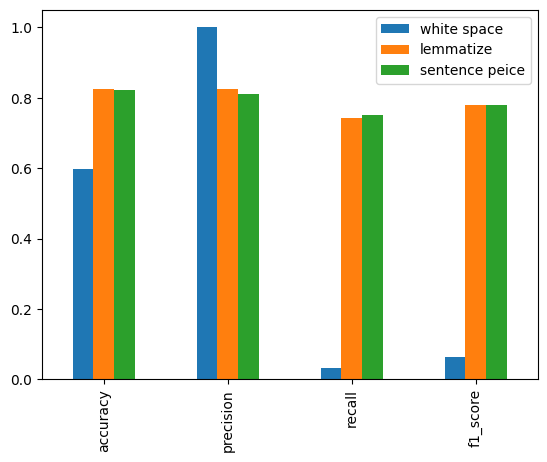

In [ ]:

#logistic regression
white_space_md_result = create_baseline_model(wht_classified_data);
stem_lz__md_result = create_baseline_model(stem_lz_classified_data);
sentence_ps_md_result= create_baseline_model(sp_classfied_tokenized);

#extract numeric values for accuracy,precision , f1 and recall
wht_sp_m = white_space_md_result[:4]
stem_lz_m = stem_lz__md_result[:4]
sp_m = sentence_ps_md_result[:4]

print('\n \n Accuracy Comparison of Tokenizers ---- logistic regression \n\n')
print('Table View:')
display(pd.DataFrame({'white space ': wht_sp_m, ' lemmatize': stem_lz_m, 'sentence peice': sp_m}, index=['accuracy', 'precision', 'recall', 'f1_score']))
print('\n\nBar Graph View: ')
pd.DataFrame({'white space ': wht_sp_m, 'lemmatize': stem_lz_m, 'sentence peice': sp_m}, index=['accuracy', 'precision', 'recall', 'f1_score']).plot(kind = 'bar')



 
 before resampling> Counter({'yes': 714, 'no': 438})

 
 after resampling> Counter({'yes': 714, 'no': 714})

 
 before resampling> Counter({'yes': 714, 'no': 438})

 
 after resampling> Counter({'yes': 714, 'no': 714})

 
 before resampling> Counter({'yes': 714, 'no': 438})

 
 after resampling> Counter({'yes': 714, 'no': 714})

 
 Accuracy Comparison of Tokenizers -- Naive Bayes 


Table View:


,white space,lemmatize,sentence peice
accuracy,0.496528,0.784722,0.815972
precision,0.789474,0.789474,0.789474
recall,0.950000,0.783333,0.791667
f1_score,0.611260,0.752000,0.781893




 
 Bar Graph View: 


<Axes: >

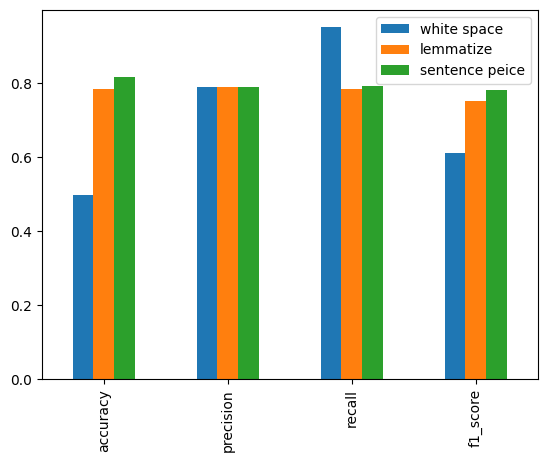

In [ ]:
#Naive bayes
white_space_md_resultnv = create_model_to_check_accuracy(wht_classified_data);
stem_lz__md_resultnv= create_model_to_check_accuracy(stem_lz_classified_data);
sentence_ps_md_resultnv= create_model_to_check_accuracy(sp_classfied_tokenized);

wht_sp_m_nv = white_space_md_resultnv[:4]
stem_lz_m_nv = stem_lz__md_resultnv[:4]
sp_m_nv= sentence_ps_md_resultnv[:4]

print('\n \n Accuracy Comparison of Tokenizers -- Naive Bayes \n\n')
print('Table View:')
display(pd.DataFrame({'white space ': wht_sp_m_nv, ' lemmatize': stem_lz_m_nv, 'sentence peice': sp_m_nv}, index=['accuracy', 'precision', 'recall', 'f1_score']))
print('\n\n \n Bar Graph View: ')
pd.DataFrame({'white space ': wht_sp_m_nv, 'lemmatize': stem_lz_m_nv, 'sentence peice': sp_m_nv}, index=['accuracy', 'precision', 'recall', 'f1_score']).plot(kind='bar')


**As shown in the above logistic regression model tokenizer comparison and naive bayes tokenizer comparison, logistic regression accuracy,precision and f1_core for lemmatize tokeniser has slightly higher than sentence piece tokenizer. But the recall is sligtly higher in sentence piece.**

 **When considering  naive bayes mode's metics of senetence piece tokenizer has higher values for accuracy,recall and f1score, which is higher than lemmatize tokenizer. Both tokenizers indicates a equal value for the precision.**


**In both models performence metrics for white space tokenizer has lower accuracy and lower f1 score. While in logistic regression, it depicts a highest precision and in naive bayes it shows a highest recall and eqaul precision to other two tokenizers.**

### **Summary**

---

**1. Whitespace tokenizer -**

* **Naive Bayes**: High recall, good precision, low F1 score.
* **Logistic Regression**: Perfect precision, very low recall, and poor F1 score.

  In conclusion, both models do have a tokenization problem with white space.

**2. Lemmatization -**

* **Naive Bayes**: Improved balanced performance across metrics.
* **Logistic Regression**: Strong balance with precision and recall.

  In conclusion, Lemmatization improves the performance of both models, making them more reliable in predicting classes either as a positive or negative class.

**3. Sentence Piece -**

* **Naive Bayes**: Good overall high accuracy and F1 score.
* **Logistic regression**: Similar to lemmatization, strong and balanced performance.

  In conclusion, sentence piece tokenization works for the two models, obtaining the best or almost best performing metrics. Specifically, more advanced tokenization techniques involving lemmatization and sentence piece benefit both models, with sentence piece generally leading in performance.




###**Final Decision**

---


**In below sections,since non transformer deep learning models and transformer deep learning models are used,I suggest to use the sentence piece.**

**Moreover, sentence piece is capable of handling informal words while lemmatize is not capable to do so.
Since this data set contains more informal words (since the all text in dataset are tweets), the sentence piece tokenizer will be the most suitable tokenizer.**

**Lemmatization might remove some important morphological data while converting words in to there root form which is not happening in sentence piece.
It's crucial to understand the internal structure and get the meaning of the senetence to indefity the purchasing intent.**

 **ex - lemmatize treats both bought and buying as same(since it converts words to the root form ex- buy) while sentence piece will capture the difference of buying and bought due to its nature of  breaking words in to subwords.(which is importaant to understand whether the user is willing to buy or has already bought).**

### Answer to Task 5

Explore 3 significantly different non-transformer deep learning models for building a predictive model for identifying purchase intent in a user tweet, justifying their specific architectures. Compare and contrast the results of their performance.

**Non-transformer models are types of artificial intelligence (AI) models that do not use the transformer architecture**.

ex - RNN,CNN,LTSM

**RNN, CNN, and LSTM models can be used to examine purchase intent in user tweets. Each has a distinct architecture useful for various text analysis applications. Let's take a quick, detailed look at each model's execution, on how it can be used for determining purchase intent from tweets.**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, SimpleRNN,GlobalAveragePooling1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import  Precision, Recall
import tensorflow as tf
import random
from imblearn.combine import SMOTEENN



tokenized_data = sp_classfied_tokenized

seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_data['text'])
sequences = tokenizer.texts_to_sequences(tokenized_data['text'])
X = pad_sequences(sequences, padding='post')

# Encode labels in dataset
le = LabelEncoder()
tokenized_data['class'] = le.fit_transform(tokenized_data['class'])
y = tokenized_data['class'].values


#split data set in to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

#resampling - both undersampling and oversampling used in datset
print("before resampling", Counter(y_train))
resampler = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
print("after resampling", Counter(y_train_resampled))



# Convert y_train to float32
y_train_resampled = y_train_resampled.astype('float32')
y_test = y_test.astype('float32')

# Common parameters
vocab_size = len(tokenizer.word_index) + 1
max_length = X.shape[1]
embedding_dim = 100

#gett the count of the classes in validation data
class_counts = Counter(y_test)
print(class_counts)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#method to view the history of the data
def plot_history(history, title):
    print('\n\n\n')
    print("Acuracy and Loss Comparison ---------------------------------------- \n")
    plt.title(title)
    plt.plot(history.history['val_accuracy'],label= 'Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


before resampling Counter({1: 662, 0: 418})
after resampling Counter({0: 177, 1: 167})
Counter({1.0: 220, 0.0: 140})


### **1. CNN(Convolutional Neural Networks) Model**




---





### **1 .Embedding Layer**






  

* **Purpose of using this layer**-

  The Embedding layer is our CNN model's first layer, it is created to preprocess sequences of integers through the mapping of each word to a dense vector of fixed size (embedding_dim). It is a very important layer for text data, because it makes the transformation of sparse, categorical information into a format that neural networks can handle more efficiently.
  

*  **Why it is needed in this analysis** -

  The dataset contains text data, e.g., tweets or commenting about purchasing an iPhone X. To be specific, the Embedding layer is the one that makes it possible for the model to understand the semantics of each word in the context of the text. As example, words like "buy" and "purchase" will get vectors that are closer in the embedding space, showing their close meanings.


 * **Details of used parameters** -

  The vocab_size parameter is used in this layer, defines the the vocabulary size, and the embedding_dim variable indicate  the dimensionality of the embedding vectors. Input_length is the length of input sequences which ensures that the each sequence has same length.

### **2. Conv1D Layer**

---


* **Purpose of using this layer**-

  Conv1D layer are purposely created for 1D convolutional operations, such as sequences (i.e. text sentences).Within these layers, filters are applied to the input sequences in order to recognize the particular aspects (such as patterns or sequences of words) that are important to the overall meaning of the sentences. we are using it for the same requirment.




*  **Why it is needed in this analysis** -

  In text classification, detecting word patterns indicates the positive and negative  intent is a  important process. This layer with using its 128 filter and kernel with size of 05, is adept at capturing these patterns across different parts of the input sequences.




*  **Details of used parameters -**

  As activation function, 'relu' (Rectified Linear Unit) is used in this layer. The reason to choose the 'Relu' as the activation function is it introduces non-linearity to the model & allows it to learn complex patterns in the data set.It is appropriate for deep learning models since it is also computationally efficient and helps to avoid the vanishing gradient problem.



### **3. GlobalMaxPooling1D Layer**


---



* **Purpose of using this layer**-

  The GlobalMaxPooling1D accepts the features captured by the Conv1D layer and reduces the dimentionlity of the features.This extract the most significant feature idenfied by each filter by redusing the complexity.






*  **Why it is needed in this analysis** -

  This layer helps to model to  identify the important features regardless of the position of the feature.It simplifies the input layer of the model and this makes traning process efficient and reduce overfitting posibility.




*  **Details of used parameters -** ---






### **3. Dense Layers(20 units & 1 unit)**


---



* **Purpose of using this layer**-
Dense layers are fully connected layers that let the model learn non-linear combinations of the high level features from the previous layers.The output shape remains linear in nature because it is fully connected.

*  **Why it is needed in this analysis** -

  The layer with 20 units acts as the decision-making layer. It starts classifying the input  based on the features that it has learned. This dense layer uses the ‘relu’ activation function to continue adding non-linearity and allowing the model to make complex decisions. It is a important addition to the model since it refines this model’s understanding before the final classification.It also containsa regularizer to avoid the overfitting.

  The Dense layer with one unit is the layer that gives the final output of this model. The sigmoid activation function decide the whether the value is a range between 0 and 1 which is perfect for binary classification.

### **4. Dropout Layers**


---



* **Purpose of using this layer**-
  Dropout layers with rate of 0.5 are powerful regularization method used in neural networs.Use to prevent the overfitting.

*  **Why it is needed in this analysis** -
The problem which text classification models face often is overfitting to training data, and their being not fully able to cope with noisy or varied text. Since dropout(0.5) layers deactivate a half of the neurons randomly when the model is being trained, it seems the most effective solution for avoiding the difficulties mentioned above. The model simply does not have an opportunity to become dependent on the specific words or phrases that may be found in texts, and instead a practice to look for more general patterns is developed.

Epoch 1/500
11/11 [==============================] - 7s 127ms/step - loss: 2.9727 - accuracy: 0.5087 - precision: 0.4952 - recall: 0.6228 - val_loss: 2.6232 - val_accuracy: 0.3889 - val_precision: 0.5000 - val_recall: 0.0136
Epoch 2/500
11/11 [==============================] - 0s 41ms/step - loss: 2.3726 - accuracy: 0.5349 - precision: 0.5347 - recall: 0.3234 - val_loss: 2.0817 - val_accuracy: 0.4139 - val_precision: 1.0000 - val_recall: 0.0409
Epoch 3/500
11/11 [==============================] - 0s 26ms/step - loss: 1.8747 - accuracy: 0.5145 - precision: 0.5000 - recall: 0.4012 - val_loss: 1.6375 - val_accuracy: 0.4139 - val_precision: 0.8462 - val_recall: 0.0500
Epoch 4/500
11/11 [==============================] - 0s 26ms/step - loss: 1.4728 - accuracy: 0.5814 - precision: 0.5827 - recall: 0.4850 - val_loss: 1.2905 - val_accuracy: 0.4722 - val_precision: 0.6471 - val_recall: 0.3000
Epoch 5/500
11/11 [==============================] - 0s 10ms/step - loss: 1.1697 - accuracy: 0.6047 - p

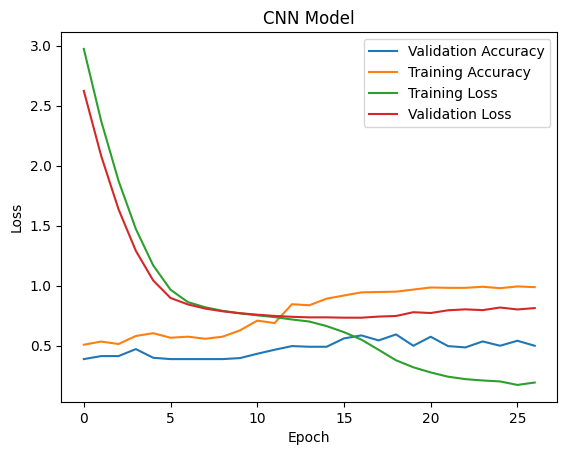

In [ ]:


# CNN Model
cnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu',kernel_regularizer=l1(0.001)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(20, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
optimiser = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['accuracy',Precision(name='precision', class_id=0),Recall(name='recall', class_id=0)])
cnn_history = cnn_model.fit(X_train_resampled, y_train_resampled, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])
print("\n\n CNN Model Summary ---------------------------------- \n")
cnn_model.summary()

# Compare accuracies
cnn_metrics = cnn_model.evaluate(X_test, y_test)[1:]

plot_history(cnn_history, 'CNN Model')

### **2. RNN(Recurrent Neural Networks)**

---





### **1 .Embedding Layer**






  

* **Purpose of using this layer**-

  The Embedding layer is our RNN model's first layer, it is created to preprocess sequences of integers through the mapping of each word to a dense vector of fixed size (embedding_dim). It is a very important layer for text data, because it makes the transformation of sparse, categorical information into a format that neural networks can handle more efficiently.
  

*  **Why it is needed in this analysis** -

  The dataset contains text data, e.g., tweets or commenting about purchasing an iPhone X. To be specific, the Embedding layer is the one that makes it possible for the model to understand the semantics of each word in the context of the text. As example, words like "buy" and "purchase" will get vectors that are closer in the embedding space, showing their close meanings.


 * **Details of used parameters** -

  The vocab_size parameter is used in this layer, defines the the vocabulary size, and the embedding_dim variable indicate  the dimensionality of the embedding vectors. Input_length is the length of input sequences which ensures that the each sequence has same length.

### **2. RNN Layer**

---


* **Purpose of using this layer**-

  This RNN layer process the word embedding sequences overtime and this layer contains of 64 unit along with ReLU as activation function. RNN is suitable for text classification since they are designed to handle sequential data.

  
*  **Why it is needed in this analysis** -
  The sequential nature of text makes RNNs a natural choice for processing it. A SimpleRNN layer can catch the temporal dependencies between the words of the sentence, which constitute a huge part of overall meaning or sentiment understanding. While the use of ReLU (Rectified Linear Unit) does help somewhat in vanishing gradients. A reguralizer has used to minimizer the overfitting.

### **3.Dense Layers**

---

* **Purpose of using this layer**-

  These are responsible for further processing the features that were extracted by the RNN layer. Three fully connected layers are used, followed by 120, 80, and finally 1 unit, where the first two use the ReLU activation for getting non-linearity, and the last uses the Sigmoid for binary classification.

* **Why it is needed in this analysis**

  Dense layers help the model to learn complex relationships between features that were extracted by the RNN layer. Activating with ReLU assures healthy gradient flow during training. The final Dense layer, activated by sigmoid, is standard for binary classification since it provides a probability between 0 and 1, thus reflecting the chance of a positive class outcome, like purchase intent. A reguralizer has used to minimizer the overfitting.

### **4. Dropout Layers**


---



* **Purpose of using this layer**-
  Dropout layers with rate of 0.4 are powerful regularization method used in neural networs.Use to prevent the overfitting.

*  **Why it is needed in this analysis** -
The problem which text classification models face often is overfitting to training data, and their being not fully able to cope with noisy or varied text. Since dropout(0.4) layers deactivate a half of the neurons randomly when the model is being trained, it seems the most effective solution for avoiding the difficulties mentioned above. The model simply does not have an opportunity to become dependent on the specific words or phrases that may be found in texts, and instead a practice to look for more general patterns is developed.

Epoch 1/500
11/11 [==============================] - 4s 101ms/step - loss: 2.8327 - accuracy: 0.5087 - precision: 0.4615 - recall: 0.0719 - val_loss: 2.6739 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
11/11 [==============================] - 0s 32ms/step - loss: 2.5451 - accuracy: 0.5087 - precision: 0.4545 - recall: 0.0599 - val_loss: 2.4043 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/500
11/11 [==============================] - 0s 24ms/step - loss: 2.2905 - accuracy: 0.5145 - precision: 0.5000 - recall: 0.0958 - val_loss: 2.1604 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
11/11 [==============================] - 0s 23ms/step - loss: 2.0588 - accuracy: 0.5262 - precision: 0.6429 - recall: 0.0539 - val_loss: 1.9424 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/500
11/11 [==============================] - 0s 14ms/step - los

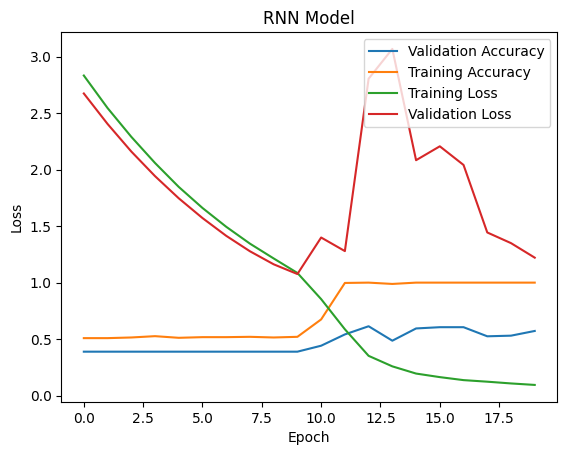

In [ ]:
# RNN Model
rnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(64, activation='relu', return_sequences=False,kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(120, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(80, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
optimiser = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['accuracy',Precision(name='precision', class_id=0),Recall(name='recall', class_id=0)])
rnn_history = rnn_model.fit(X_train_resampled, y_train_resampled, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])
print("\n\n RNN Model Summary  ---------------------------------- \n")
rnn_model.summary()


# Compare accuracies
rnn_metrics = rnn_model.evaluate(X_test, y_test)[1:]

plot_history(rnn_history, 'RNN Model')

### **3. LSTM(Long Short-Term Memory)**

---




### **1 .Embedding Layer**






  

* **Purpose of using this layer**-

  The Embedding layer is our LSTM model's first layer, it is created to preprocess sequences of integers through the mapping of each word to a dense vector of fixed size (embedding_dim). It is a very important layer for text data, because it makes the transformation of sparse, categorical information into a format that neural networks can handle more efficiently.
  

*  **Why it is needed in this analysis** -

  The dataset contains text data, e.g., tweets or commenting about purchasing an iPhone X. To be specific, the Embedding layer is the one that makes it possible for the model to understand the semantics of each word in the context of the text. As example, words like "buy" and "purchase" will get vectors that are closer in the embedding space, showing their close meanings.


 * **Details of used parameters** -

  The vocab_size parameter is used in this layer, defines the the vocabulary size, and the embedding_dim variable indicate  the dimensionality of the embedding vectors. Input_length is the length of input sequences which ensures that the each sequence has same length.

### **2. LSTM Layer**

---

* **Purpose of using this layer**- processes the word embedding sequence. It is particularly useful for capturing word contexts because it has been designed to handle sequential data and may discover dependencies that were previously hundreds of steps away. With 64 units and the tanh activation function, this layer outputs sequences—that is, the entire hidden state sequence, not just the last one.

*  **Why it is needed in this analysis** -

  The sequential nature of text makes LSTM is a good choice to process the data. LSTMS are capable of learning dependencies between words located far in a sentence, which will be crucial to predicting the overall sentiment or intent of that particular sentence. The tanh activation function, helps maintain gradient flow during training and stops it from vanishing. L2 regularization ensures prevention of overfitting by penalizing large weights.




### **3. GlobalMaxPooling1D Layer**


---

* **Purpose of using this layer**-
It reduces the dimensionality of output from the LSTM layer to a fixed size by taking the maximum over the time dimension for each feature.

* **Why it is needed in this analysis** -
GlobalMaxPooling1D contributes to the reduction in computational complexity and a decrease in the number of parameters. At the same time, it captures the major features of the LSTM output. This process is very helpful, especially in classification tasks.


### **4.Dense Layers**

---

* **Purpose of using this layer**-

 Fully connected layers for further processing of the features extracted by LSTM and pooling layers.
 In this model 2 dense layers are included.One with 100 units and the other with 1 unit. ReLU activation functione applied non-linearity from the first layer,while the second uses sigmoid to do binary classification

* **Why it is needed in this analysis**

  Dense layers help the model to learn complex relationships between features that were extracted by the RNN layer. Activating with ReLU assures healthy gradient flow during training. The final Dense layer, activated by sigmoid, is standard for binary classification since it provides a probability between 0 and 1, thus reflecting the chance of a positive class outcome, like purchase intent. A reguralizer has used to minimizer the overfitting.

### **4. Dropout Layers**


---



* **Purpose of using this layer**-
  Dropout layers with rate of 0.4 are powerful regularization method used in neural networs.Use to prevent the overfitting.

*  **Why it is needed in this analysis** -
The problem which text classification models face often is overfitting to training data, and their being not fully able to cope with noisy or varied text. Since dropout(0.4) layers deactivate a half of the neurons randomly when the model is being trained, it seems the most effective solution for avoiding the difficulties mentioned above. The model simply does not have an opportunity to become dependent on the specific words or phrases that may be found in texts, and instead a practice to look for more general patterns is developed.

Epoch 1/500
11/11 [==============================] - 4s 112ms/step - loss: 2.5576 - accuracy: 0.5029 - precision: 0.3000 - recall: 0.0180 - val_loss: 2.3445 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
11/11 [==============================] - 0s 29ms/step - loss: 2.1841 - accuracy: 0.5145 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0113 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/500
11/11 [==============================] - 0s 20ms/step - loss: 1.8784 - accuracy: 0.5174 - precision: 1.0000 - recall: 0.0060 - val_loss: 1.7386 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
11/11 [==============================] - 0s 20ms/step - loss: 1.6293 - accuracy: 0.5145 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5223 - val_accuracy: 0.3889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/500
11/11 [==============================] - 0s

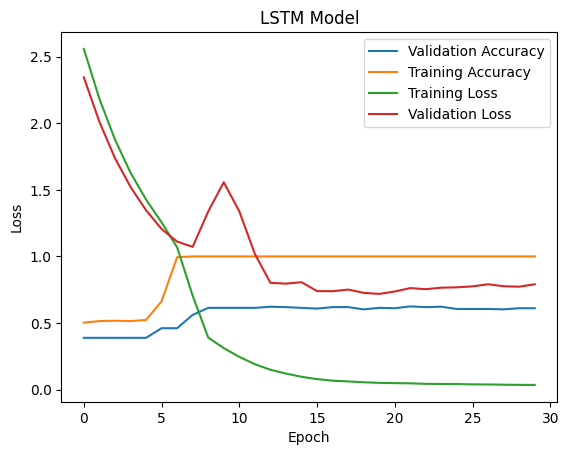

In [ ]:
# LSTM Model
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(units = 64, activation='tanh',return_sequences=True,kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    GlobalMaxPooling1D(),
    Dense(100, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
lstm_optimiser = Adam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_optimiser, loss='binary_crossentropy', metrics=['accuracy',Precision(name='precision', class_id=0),Recall(name='recall', class_id=0) ])
lstm_history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])
print("\n\n LSTM Model Summary  ---------------------------------- \n")
lstm_model.summary()

# Compare accuracies
lstm_metrics = lstm_model.evaluate(X_test, y_test)[1:]

plot_history(lstm_history, 'LSTM Model')

Compare the overal results of the non-transformer deep learning models.

when comparing ths loss

CNN Accuracy: 0.5
RNN Accuracy: 0.5722222328186035
LSTM Accuracy: 0.6111111044883728
BASELINE Accuracy: 0.8159722222222222


 Accuracy comparison of non transformer models with basline model- Table view


,CNN,RNN,LSTM,BASELINE
accuracy,0.500000,0.572222,0.611111,0.815972
precision,0.589286,0.625000,0.650376,0.789474
recall,0.600000,0.750000,0.786364,0.791667
f1_score,0.594595,0.681818,0.711934,0.781893




 Accuracy comparison of non transformer models with basline model- Bar graph view


<Axes: >

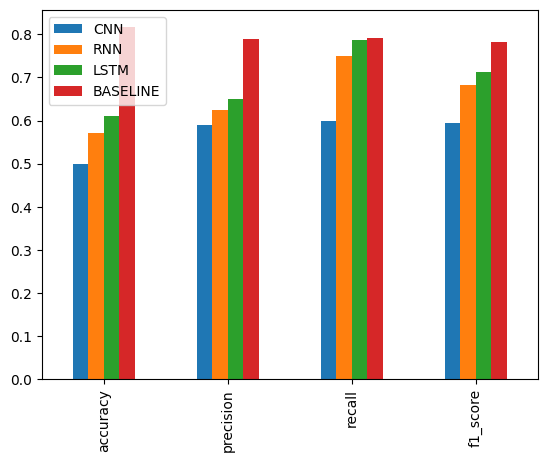

In [ ]:
print(f"CNN Accuracy: {cnn_metrics[0]}")
print(f"RNN Accuracy: { rnn_metrics[0]}")
print(f"LSTM Accuracy: {lstm_metrics[0]}")
print(f"BASELINE Accuracy: {sp_m_nv[0]}")

#define a method to get the f1 score
def cal_f1_score(metrics):
  return (2 * metrics[1] * metrics[2]) / (metrics[1] + metrics[2])

#calculate f1 score for RNN, CNN and LSTM.
cnn_metrics.append(cal_f1_score(cnn_metrics))
rnn_metrics.append(cal_f1_score(rnn_metrics))
lstm_metrics.append(cal_f1_score(lstm_metrics))

print("\n\n Accuracy comparison of non transformer models with basline model- Table view")
display(pd.DataFrame({'CNN' :cnn_metrics,'RNN':rnn_metrics,'LSTM' : lstm_metrics, 'BASELINE': sp_m_nv},index=['accuracy', 'precision', 'recall', 'f1_score']))

print("\n\n Accuracy comparison of non transformer models with basline model- Bar graph view")
display(pd.DataFrame({'CNN' :cnn_metrics,'RNN':rnn_metrics,'LSTM' : lstm_metrics, 'BASELINE': sp_m_nv}, index=['accuracy', 'precision', 'recall', 'f1_score']).plot(kind='bar' ))

In above models, since the data set is imbalanced, precision and  recall calculated for the class that has fewer data points, which is 'no' class. The main reason to this action is the class 'yes' has a higher representation in data and model might predict that most.

Considering above comparing only accuracy, might be misleading.
Therefore in below section and above chart all metrics, accuracy, precision for minority class, recall for minority class and f1 Score is compared.

### **Accuracy:**
* **Baseline:** Accuracy value is the maximum for this one.
* **RNN:** lower than both LSTM & Baseline.
* **LSTM:** lower than Baseline.
* **CNN:** Lowest; it might struggle much more with the this task.

### **Precision:**
* **Baseline:** the highest
among the four.

* **RNN**: Lower than Baseline & LSTM but higher than  CNN.
* **LSTM**: lower than Baseline and higher than CNN and RNN

* **CNN**: Low in this case.

 Precision measures the accuracy of the positive predictions. Highest for Baseline means that it makes the least number of errors of false positive. CNN has the lowest, which means that it makes more false positive errors compared to the others.

### **Recall:**
* **Baseline** : has the highest recall.
* **LSTM** : lower than the Basline.
* **RNN** : has a lower rate than the LSTM.
* **CNN** :has the lowest recall.

  Recall measures the sensitivity.of the model(true positive rate). Baseline is strong when is comes to idenfying true positive in the data set. Since CNN has the lowest, it depict a poor ability to identiy the the true positives.

### **F1 Score**:
* **Baseline**: Highest
* **RNN**: Lower than Baseline & LSTM but higher than CNN.
* **LSTM**: lower than basline but higher than RNN and CNN.
* **CNN**: Lowest

  The F1 score is the mean of precision and recall. Baseline model has the highest F1 score here implies good balance between precision and recall. The lowest of them is the case of CNN, which shows it does poorly in balancing both metrics.

### **Overall Performance**:
* **Baseline Model**: This models has the highest Accuracy, Precision,recall and F1-score, meaning that it performs very effectively in relation to the given task.

* **LSTM Model**: Model is second model strong when it comes to all the metrics.
Which depict that model is good at understanding the task.

* **RNN Model**: The RNN model consistently performs but does not outperform the Baseline and LSTM over any specific metric. Since its loss is high need further improvements.

* **CNN Model**: Performed the worst over all the metrics, meaning that it might just not be suitable for this classification.



### Answer to Task 6

Explore encoder-only transformer models for building a predictive model for identifying purchase intent in a user tweet and compare its performance with the models developed for Task 4.

In [ ]:
!pip install transformers[torch]
!pip install accelerate>=0.21.0 -U
!pip show accelerate


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,RobertaForSequenceClassification
from datasets import Dataset, ClassLabel
import numpy as np

tokenized_data_transform = sp_preorocessed_data

tokenized_texts = tokenized_data_transform['text'].tolist()
labels = tokenized_data_transform['class'].tolist()


#loading the tonkinizers of pretranined models.
bert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
roberta_tokenizer = AutoTokenizer.from_pretrained('roberta-base')

#tokenized text using each model's tokenizer
bert_tokenized_texts = bert_tokenizer(tokenized_texts, padding=True, truncation=True, return_tensors="pt")
roberta_tokenized_texts = roberta_tokenizer(tokenized_texts, padding=True, truncation=True, return_tensors="pt")

#assigning the classes and encode them by mapping them t numerical values
class_names = ['no', 'yes']
label_encoder = ClassLabel(num_classes=len(class_names), names=class_names, id=[0, 1])

# Define compute_metrics function for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall,f1_score, _  = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': (predictions == labels).mean(),
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        }

#metho implementation for initialize the trainer
def initTrainer(pretraned_model,train_dataset,test_dataset):
   return Trainer(
    model=pretraned_model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

#get the data set from Dataset
def get_dataset(tokenized_texts, labels):
    return Dataset.from_dict({
      'input_ids': tokenized_texts['input_ids'],
      'attention_mask': tokenized_texts['attention_mask'],
      'labels': label_encoder.str2int(labels)
    })

#split data set into train and test data
def split_dataset(dataset, test_size=0.2):
    return dataset.train_test_split(test_size=test_size)

# Define training arguments for both roberta and bert
training_arguments = TrainingArguments(
    output_dir='./results',
    num_train_epochs=6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    optim='adamw_torch',
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch"
)

#get the data set created form Dataset for both models
bert_data_set = get_dataset(bert_tokenized_texts, labels)
roberta_data_set = get_dataset(roberta_tokenized_texts, labels)

#spliting data set in to traning and testing data
bert_split_data = split_dataset(bert_data_set)
roberta_split_data = split_dataset(roberta_data_set)

#assigning traning and testing data for roberta
bert_train_dataset = bert_split_data['train']
bert_test_dataset = bert_split_data['test']

#assigning traning and testing data for roberta
roberta_train_dataset = roberta_split_data['train']
roberta_test_dataset = roberta_split_data['test']

# Load the pre-trained model
model_bert = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Bert - model initializing, training and evaluating
trainer_bert = initTrainer(model_bert,bert_train_dataset,bert_test_dataset)
trainer_bert.train()
#getting results for bert and view
bert_results = trainer_bert.evaluate()
print("\n\n DistilBERT Results:" ,bert_results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
1,No log,0.640285,0.600858,0.361031,0.600858,0.451046
2,No log,0.498604,0.746781,0.774850,0.746781,0.749230
3,No log,0.450231,0.802575,0.806812,0.802575,0.803742
4,No log,0.547516,0.785408,0.794794,0.785408,0.787271
5,0.471700,0.635085,0.802575,0.808300,0.802575,0.803955
6,0.471700,0.711305,0.811159,0.816797,0.811159,0.812479


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 DistilBERT Results: {'eval_loss': 0.7113046646118164, 'eval_accuracy': 0.8111587982832618, 'eval_precision': 0.8167968537150587, 'eval_recall': 0.8111587982832618, 'eval_f1_score': 0.8124791165870259, 'eval_runtime': 0.2536, 'eval_samples_per_second': 918.76, 'eval_steps_per_second': 118.295, 'epoch': 6.0}


In [ ]:
#Roberta -model initializing , training and evaluating
trainer_roberta = initTrainer(model_roberta,roberta_train_dataset,roberta_test_dataset)
trainer_roberta.train()
roberta_results = trainer_roberta.evaluate()
#gettng results for roberta and view
print("\n\n Roberta Results:" ,roberta_results)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
1,No log,0.669656,0.605150,0.366207,0.605150,0.456290
2,No log,0.636048,0.639485,0.728570,0.639485,0.634116
3,No log,0.603633,0.712446,0.753554,0.712446,0.714804
4,No log,0.751629,0.776824,0.774644,0.776824,0.774232
5,0.531800,0.774060,0.768240,0.768240,0.768240,0.768240
6,0.531800,0.969402,0.768240,0.766940,0.768240,0.762628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Roberta Results: {'eval_loss': 0.9694016575813293, 'eval_accuracy': 0.7682403433476395, 'eval_precision': 0.7669403146769735, 'eval_recall': 0.7682403433476395, 'eval_f1_score': 0.7626278504576245, 'eval_runtime': 0.3923, 'eval_samples_per_second': 593.885, 'eval_steps_per_second': 76.466, 'epoch': 6.0}


CNN Accuracy: 0.5
RNN Accuracy: 0.5722222328186035
LSTM Accuracy: 0.6111111044883728
BASELINE Accuracy: 0.8159722222222222
DistilBERT Accuracy: 0.8111587982832618
Roberta Accuracy: 0.7682403433476395


 Accuracy comparison of non transformer models with basline model- Table view


,CNN,RNN,LSTM,BERT,ROBERTA
accuracy,0.500000,0.572222,0.611111,0.811159,0.768240
precision,0.589286,0.625000,0.650376,0.816797,0.766940
recall,0.600000,0.750000,0.786364,0.811159,0.768240
f1_score,0.594595,0.681818,0.711934,0.812479,0.762628




 Accuracy comparison of non transformer models with basline model- Bar graph view


<Axes: >

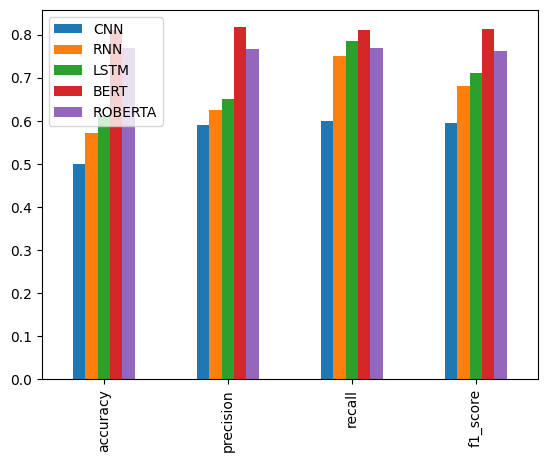

In [ ]:

print(f"CNN Accuracy: {cnn_metrics[0]}")
print(f"RNN Accuracy: { rnn_metrics[0]}")
print(f"LSTM Accuracy: {lstm_metrics[0]}")
print(f"BASELINE Accuracy: {sp_m_nv[0]}")
print(f"DistilBERT Accuracy: {bert_results['eval_accuracy']}")
print(f"Roberta Accuracy: {roberta_results['eval_accuracy']}")

bert_eval_metrics = [bert_results['eval_accuracy'], bert_results['eval_precision'], bert_results['eval_recall'], bert_results['eval_f1_score']]
roberta_eval_metrics = [roberta_results['eval_accuracy'], roberta_results['eval_precision'], roberta_results['eval_recall'], roberta_results['eval_f1_score']]


print("\n\n Accuracy comparison of non transformer models with basline model- Table view")
display(pd.DataFrame({'CNN' :cnn_metrics,'RNN':rnn_metrics,'LSTM' : lstm_metrics,'BERT' : bert_eval_metrics, 'ROBERTA':roberta_eval_metrics },index=['accuracy', 'precision', 'recall', 'f1_score']))

print("\n\n Accuracy comparison of non transformer models with basline model- Bar graph view")
display(pd.DataFrame({'CNN' :cnn_metrics,'RNN':rnn_metrics,'LSTM' : lstm_metrics,'BERT' : bert_eval_metrics, 'ROBERTA': roberta_eval_metrics}, index =['accuracy', 'precision', 'recall', 'f1_score']).plot(kind='bar', ))




**As shown in above chart Bert and roberta has a higer value in each metric.**

**Amoung Bert and Roberta, Bert has the highest values for each metric.**

In this section, All metrics comapred since the data set is imbalanced.

### Answer to Task 7

Use 3 existing pretrained large language models (of which at least 1 should be an open-source model), initially in zero-shot mode and then using few-shot prompting to identify purchase intent from tweets using a few examples from the dataset provided. Compare the performance of these models with those developed for Tasks 4 and 5 above.

In [ ]:
!pip install transformers
!pip install transformers torch


In [ ]:
from transformers import GPTNeoForCausalLM,T5ForConditionalGeneration, T5Tokenizer,BartForConditionalGeneration, BartTokenizer
import torch
from transformers import ( AutoModelForCausalLM,AutoTokenizer,AutoModelForSeq2SeqLM,BartForConditionalGeneration,BartTokenizer)

tokenized_data_decode = sp_classified_data


def perform_zeroshot_GPT(tweet):
    prompt = f"The following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
    inputs = gpt2_tokenizer(prompt, return_tensors="pt",padding=True)
    attention_mask = (inputs['input_ids'] != gpt2_tokenizer.pad_token_id).long()
    outputs = gpt2_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10,attention_mask=attention_mask)
    result = gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return "Yes" if "yes" in result else "No"


def perform_fewshot_GPT(tweet):
  prompt = examples + f"The following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
  pad_token_id = gpt2_tokenizer.pad_token_id
  inputs = gpt2_tokenizer(prompt, return_tensors="pt",padding='max_length',truncation=True)
  attention_mask = (inputs['input_ids'] != gpt2_tokenizer.pad_token_id).long()
  outputs = gpt2_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10,attention_mask=attention_mask)
  result = gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)
  return "Yes" if "yes" in result else "No"

def calculate_accuracy(model_fn, model_name):
    correct_predictions = 0
    tokenized_data = tokenized_data_decode[:50]
    total_predictions = len(tokenized_data_decode)

    for index, row in tokenized_data_decode.iterrows():
        tweet = row['text']
        actual_label = row['class']
        predicted_label = model_fn(tweet)
        if predicted_label.lower() == actual_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    return accuracy



examples = f"""
Tweet :{tokenized_data_decode['text'][20]}
Purchase intent: {tokenized_data_decode['class'][20]}

Tweet :{tokenized_data_decode['text'][25]}
Purchase intent: {tokenized_data_decode['class'][25]}

Tweet :{tokenized_data_decode['text'][30]}
Purchase intent: {tokenized_data_decode['class'][30]}

Tweet :{tokenized_data_decode['text'][35]}
Purchase intent: {tokenized_data_decode['class'][35]}

Tweet :{tokenized_data_decode['text'][40]}
Purchase intent: {tokenized_data_decode['class'][40]}

Tweet :{tokenized_data_decode['text'][45]}
Purchase intent: {tokenized_data_decode['class'][45]}

"""



In [ ]:
#GPT Model

gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token


gpt2_model = AutoModelForCausalLM.from_pretrained("gpt2")

gpt2_zeroshot = calculate_accuracy(perform_zeroshot_GPT,"GPT-2")
gpt2_few_result = calculate_accuracy(lambda tweet:perform_fewshot_GPT(tweet), "GPT Few-Shot")



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Accuracy for GPT-2: 0.00


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Accuracy for GPT Few-Shot: 0.00


In [ ]:
t5_model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")
t5_tokenizer = T5Tokenizer.from_pretrained("google-t5/t5-small")



def perform_zeroshot_T5(tweet):
    prompt = f"The following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
    inputs = t5_tokenizer(prompt, return_tensors="pt",truncation=True)
    attention_mask = (inputs['input_ids'] != t5_tokenizer.pad_token_id).long()
    outputs = t5_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10,attention_mask=attention_mask)
    result = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return "Yes" if "yes" in result else "No"


def perform_fewshot_T5(tweet):
  prompt = "look in to these examples:"+ examples + f"\nThe following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
  inputs = t5_tokenizer(prompt, return_tensors="pt",padding='max_length')
  attention_mask = (inputs['input_ids'] != t5_tokenizer.pad_token_id).long()
  outputs = t5_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10,attention_mask=attention_mask)
  result = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
  return "Yes" if "yes" in result else "No"

  # T5 Model
t5_result_zero_shot = calculate_accuracy(perform_zeroshot_T5,"T5-Zero-Shot")
t5_result_few_shot  = calculate_accuracy(lambda tweet:perform_fewshot_T5(tweet), "T5 Few-Shot")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Accuracy for T5-Zero-Shot: 0.00
Accuracy for T5 Few-Shot: 0.00


In [ ]:
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

def perform_zeroshot_BART(tweet):
  prompt = f"The following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
  inputs = bart_tokenizer(prompt, return_tensors="pt")
  outputs = bart_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10)
  result = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
  return "Yes" if "yes" in result else "No"


def perform_fewshot_BART(tweet):
  prompt =  "look in to these examples:"+ examples + f"\nThe following is a tweet. Determine if the tweet shows purchase intent:\nTweet: \"{tweet}\"\nPurchase intent: Yes/No"
  inputs = bart_tokenizer(prompt, return_tensors="pt",padding='max_length')
  outputs = bart_model.generate(inputs.input_ids, max_length=inputs.input_ids.shape[1] + 10)
  result = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
  return "Yes" if "yes" in result else "No"


# BART Model
bart_zero_shot = calculate_accuracy(perform_zeroshot_BART,"BART-Zero-Shot")
bart_result_few_shot = calculate_accuracy(lambda tweet:perform_fewshot_BART(tweet), "BART Few-Shot")

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.


Accuracy for BART-Zero-Shot: 0.00
Accuracy for BART Few-Shot: 0.00


In [ ]:
#get results from task 5 and 6 models for above test set
# Tokenize the texts
tokenizer = Tokenizer()
data = tokenized_data_decode[:50]
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X_data = pad_sequences(sequences, padding='post')

# Encode labels in dataset
le = LabelEncoder()
data['class'] = le.fit_transform(tokenized_data['class'])
y_data = data['class'].values

In [ ]:
cnn_metrics_new = cnn_model.evaluate(X_data, y_data)

In [ ]:
rnn_metrics_new = rnn_model.evaluate(X_data, y_data)

In [ ]:
lstm_metrics_new = lstm_model.evaluate(X_data, y_data)

In [ ]:
#Bert - model initializing, training and evaluating
bert_results_new = trainer_bert.evaluate(data)

In [ ]:

roberta_results_new = trainer_roberta.evaluate(data)

In [ ]:
print(f"CNN Accuracy: {cnn_metrics_new[1]}")
print(f"RNN Accuracy: {rnn_metrics_new[1]}")
print(f"LSTM Accuracy: {lstm_metrics_new[1]}")
print(f"BASELINE Accuracy: {sp_m_nv[0]}")
print(f"DistilBERT Accuracy: {bert_results_new['eval_accuracy']}")
print(f"Roberta Accuracy: {roberta_results_new['eval_accuracy']}")
print(f"GPT-2 Accuracy : {gpt2_few_result}")
print(f"T5 Accuracy: {t5_result_few_shot}")
print(f"BART Accuracy: {bart_result_few_shot}")

print("\n\n Accuracy comparison of non transformer models and transformer model- Table view")
display(pd.DataFrame({"Model":['CNN','RNN','LSTM','BERT', 'ROBERTA','GPT-2','T5','BART'], 'Accuracies':[cnn_metrics[1], rnn_metrics[1],lstm_metrics[1],bert_results['eval_accuracy'],roberta_results['eval_accuracy'],gpt2_few_result,t5_result_few_shot,bart_result_few_shot]}))

print("\n\n Accuracy comparison of non transformer models and transformer model- Bar graph view")
display(pd.DataFrame({"Model":['CNN','RNN','LSTM','BERT', 'ROBERTA','GPT-2','T5','BART'], 'Accuracies':[cnn_metrics[1], rnn_metrics[1],lstm_metrics[1],bert_results['eval_accuracy'],roberta_results['eval_accuracy'],gpt2_few_result,t5_result_few_shot,bart_result_few_shot]}, lstm_metrics = lstm_model.evaluate(X_test, y_test)
).plot(x='Model',y='Accuracies',kind='bar'))